In [5]:
import meep as mp
from meep import mpb
import numpy as np

geometry_lattice = mp.Lattice(size=mp.Vector3(5, 5))

geometry = [mp.Cylinder(0.2, material=mp.Medium(epsilon=12))]
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)
geometry.append(mp.Cylinder(0.2, material=mp.air))

resolution = 16
k_points = [
    mp.Vector3(),
    mp.Vector3(0.5, 0.5),
]
k_points = mp.interpolate(4, k_points)
num_bands = 50

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

ms.run_tm()
tm_bands = ms.all_freqs

Initializing eigensolver data
Computing 50 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 80 x 80 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (5, 0, 0)
     (0, 5, 0)
     (0, 0, 1)
Cell volume = 25
Reciprocal lattice vectors (/ 2 pi):
     (0.2, -0, 0)
     (-0, 0.2, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (2,2,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (1,2,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,2,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-1,2,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-2,2,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (2,1,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (1,1,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,1,0)
   

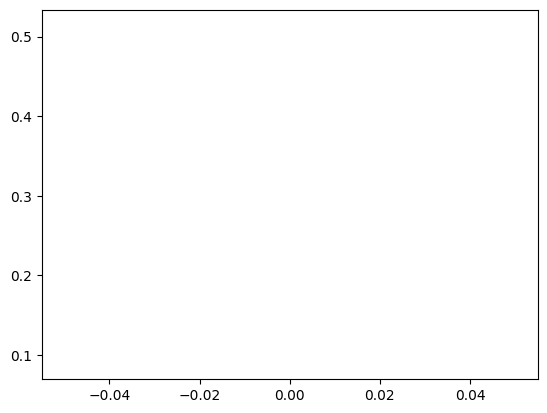

In [11]:
import matplotlib.pyplot as plt

for i in range(num_bands):
    # te_band = [b[i] for b in te_bands]
    tm_band = [b[i] for b in tm_bands]
    # plt.plot(te_band, r')
    plt.plot(tm_band, 'b')

In [12]:
mpb.output_efield_z(ms, 25)

Outputting fields to e.k01.b25.z.tm.h5...
